Is there a relationship between total_call_minutes and total_call_minutes_android?

Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables: One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
x is total_call_minutes_android(feature)
y is total_call_minutes(response)

In [1]:
%matplotlib inline
from fbprophet import Prophet

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as smf

In [3]:
data_path3 = "C:/Users/Anusha/Documents/Copied on 9_26_19/Fall 2019/Data Science/Project/GoogleMeet.csv"
df = pd.read_csv(data_path3)

In [4]:
lm = smf.ols(formula='total_call_minutes ~ total_call_minutes_android', data=df).fit()
lm.params

Intercept                     1082.071219
total_call_minutes_android       2.214160
dtype: float64

Interpreting Model Coefficients
How do we interpret the total_call_minutes_android coefficient ( 𝛽1 )?
A "unit" increase in total_call_minutes_android is associated with a 2.214160 "unit" increase in total_call_minutes.

Using the Model for Prediction
Let's say that UNCG is purchasing 10000 licenses for android devices. We can predict the number of call minutes which are made especially using android devices

𝑦=𝛽0+𝛽1𝑥
 
𝑦=1082.071219+2.214160×10

In [17]:
1082.071219+2.214160*10

1104.2128189999999

Thus, we would predict total call minutes of 1104.2128189999999 in UNCG.

Using Statsmodels to make the prediction:

In [18]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'total_call_minutes_android': [10]})
X_new.head()

,total_call_minutes_android
0,10


In [19]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    1104.212822
dtype: float64

Plotting the Least Squares Line

Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:

In [20]:
X_new = pd.DataFrame({'total_call_minutes_android': [df.total_call_minutes_android.min(), df.total_call_minutes_android.max()]})
X_new.head()

,total_call_minutes_android
0,0
1,2083


In [21]:
preds = lm.predict(X_new)
preds

0    1082.071219
1    5694.167162
dtype: float64

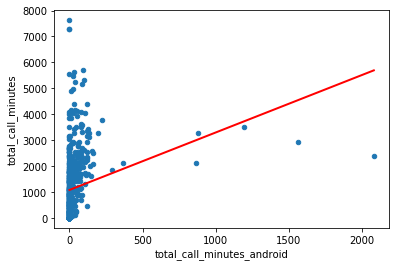

In [22]:
# first, plot the observed data
df.plot(kind='scatter', x='total_call_minutes_android', y='total_call_minutes')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [23]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,972.178092,1191.964346
total_call_minutes_android,1.432727,2.995593


As it relates to model coefficients, here is the conventional hypothesis test:

null hypothesis: There is no relationship between total_call_minutes_android and total_call_minutes (and thus  𝛽1  equals zero)
alternative hypothesis: There is a relationship between total_call_minutes_android and total_call_minutes (and thus  𝛽1  is not equal to zero)
How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval does not include zero. Conversely, the p-value represents the probability that the coefficient is actually zero:

In [24]:
# print the p-values for the model coefficients
lm.pvalues

Intercept                     9.508992e-64
total_call_minutes_android    4.108825e-08
dtype: float64

In this case, the p-value for total_call_minutes_android is far less than 0.05, we reject the null hypothesis and so we believe that there is a relationship between total_call_minutes_android and total_call_minutes.

How Well Does the Model Fit the data?
The most common way to evaluate the overall fit of a linear model is by the R-squared value.


R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model.
The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model.

In [25]:
# print the R-squared value for the model
lm.rsquared

0.05416211792430492

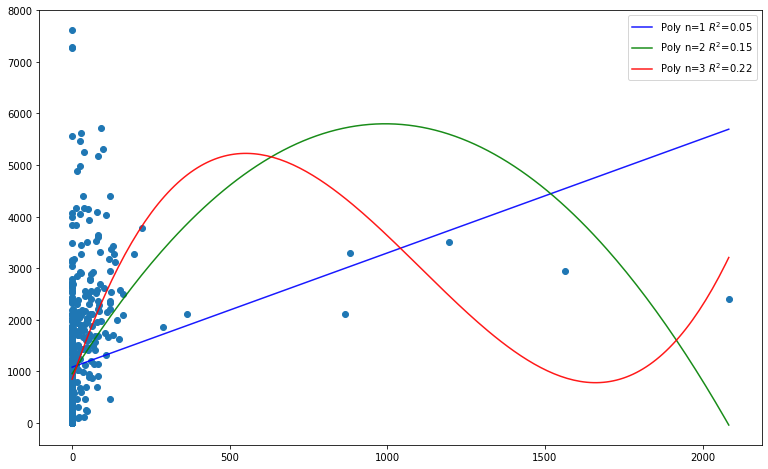

In [27]:
plt.figure(figsize=(8 * 1.618, 8))

plt.scatter(df.total_call_minutes_android, df.total_call_minutes)

df1 = df

poly_1 = smf.ols(formula='total_call_minutes ~ 1 + total_call_minutes_android', data=df).fit()

x = pd.DataFrame({'total_call_minutes_android': np.linspace(df.total_call_minutes_android.min(), df.total_call_minutes_android.max(), 200)})


plt.plot(x.total_call_minutes_android, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='total_call_minutes ~ 1 + total_call_minutes_android + I(total_call_minutes_android ** 2.0)', data=df).fit()
plt.plot(x.total_call_minutes_android, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='total_call_minutes ~ 1 + total_call_minutes_android + I(total_call_minutes_android ** 2.0) + I(total_call_minutes_android ** 3.0)', data=df).fit()
plt.plot(x.total_call_minutes_android, poly_3.predict(x), 'r-', alpha=0.9, label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()